In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_internshala():
    url = 'https://internshala.com/internships/data%20science-internship'
    internships = []

    # Scrape multiple pages
    for page in range(1, 4):  # Specify the number of pages you want to scrape (e.g., 1, 2, 3)
        response = requests.get(url, params={'page': page})
        soup = BeautifulSoup(response.text, 'html.parser')

        listings = soup.find_all('div', class_='individual_internship')

        for listing in listings:
            try:
                title = listing.find('a').text.strip()
            except AttributeError:
                title = 'Not available'

            try:
                company = listing.find('a', class_='link_display_like_text').text.strip()
            except AttributeError:
                company = 'Not available'

            try:
                location = listing.find('a', class_='location_link').text.strip()
            except AttributeError:
                location = 'Not available'

            try:
                stipend = listing.find('span', class_='stipend').text.strip()
            except AttributeError:
                stipend = 'Not available'

            internship = {
                'Title': title,
                'Company': company,
                'Location': location,
                'Stipend': stipend
            }
            internships.append(internship)

    df = pd.DataFrame(internships)
    return df

# Call the function to scrape Internshala for data science internships
data_frame = scrape_internshala()

# Print the data frame with more than 50 rows
print(data_frame.head(50))  # Print the first 50 rows


                                                Title  \
0                                      Data Analytics   
1                           Technical Content Writing   
2                                          Operations   
3                                           Mentoring   
4                     Data Science (Machine Learning)   
5                                        Data Science   
6                                  Data Visualization   
7                                      Data Analytics   
8                                        Data Science   
9                                      Data Analytics   
10                                         Operations   
11                                    NLP Engineering   
12                   Data Analysis (Nudge-IAF Punjab)   
13                                       Data Science   
14                                Business Analysis-2   
15                                       UI/UX Design   
16  Social Media Marketing Inte

In [23]:
import pandas as pd

# Assuming you have a DataFrame named 'data_frame'

# Convert the DataFrame to a CSV file
data_frame.to_csv('internship_data.csv', index=False)

In [26]:
import pandas as pd
import numpy as np

# Load the scraped data into a DataFrame
data_frame = pd.read_csv('internship_data.csv')

# Perform data cleaning steps
# Remove duplicates
data_frame.drop_duplicates(inplace=True)

# Remove rows with missing values
data_frame.dropna(inplace=True)

# Reset the index
data_frame.reset_index(drop=True, inplace=True)

# Clean the 'Stipend' column by removing unwanted characters
data_frame['Stipend'] = data_frame['Stipend'].str.replace('₹', '')
data_frame['Stipend'] = data_frame['Stipend'].str.replace(',', '')
data_frame['Stipend'] = data_frame['Stipend'].str.replace('/month', '')

def clean_stipend(row):
    if '-' in row:
        split_stipend = row.split('-')
        if len(split_stipend) == 2:
            try:
                return (int(split_stipend[0]) + int(split_stipend[1])) / 2
            except ValueError:
                return row
    try:
        return float(row)
    except ValueError:
        return row


data_frame['Stipend'] = data_frame['Stipend'].apply(clean_stipend)

# Print the cleaned data frame
print(data_frame.head(50))


                                                Title  \
0                                      Data Analytics   
1                           Technical Content Writing   
2                                          Operations   
3                                           Mentoring   
4                     Data Science (Machine Learning)   
5                                        Data Science   
6                                  Data Visualization   
7                                      Data Analytics   
8                                        Data Science   
9                                      Data Analytics   
10                                         Operations   
11                                    NLP Engineering   
12                   Data Analysis (Nudge-IAF Punjab)   
13                                       Data Science   
14                                Business Analysis-2   
15                                       UI/UX Design   
16  Social Media Marketing Inte

            Stipend
count    105.000000
mean    9071.428571
std     6440.716549
min     1000.000000
25%     5000.000000
50%     8000.000000
75%    10000.000000
max    30000.000000


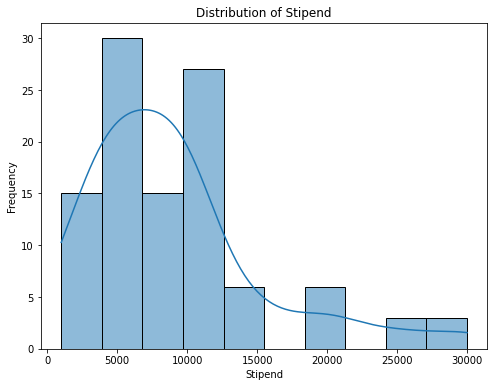

C:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


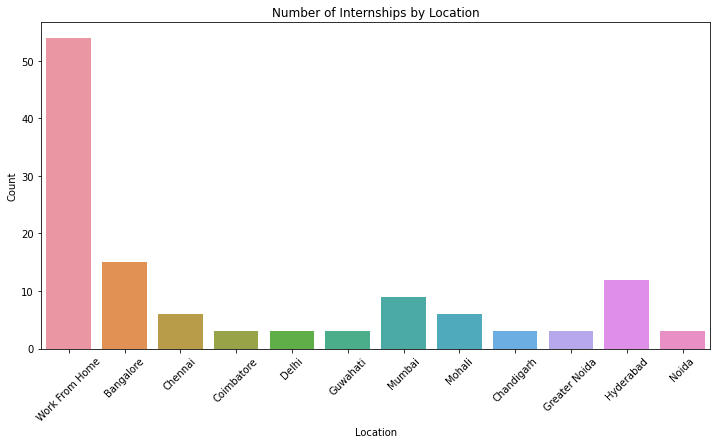

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
data_frame = pd.read_csv('internship_data.csv')

# Clean the 'Stipend' column
data_frame['Stipend'] = data_frame['Stipend'].str.replace(',', '')
data_frame['Stipend'] = data_frame['Stipend'].str.replace('/month', '')
data_frame['Stipend'] = data_frame['Stipend'].str.split('-', expand=True)[0]
data_frame['Stipend'] = pd.to_numeric(data_frame['Stipend'], errors='coerce')

# Summary statistics
print(data_frame.describe())

# Histogram of Stipend
plt.figure(figsize=(8, 6))
sns.histplot(data_frame['Stipend'], bins=10, kde=True)
plt.title('Distribution of Stipend')
plt.xlabel('Stipend')
plt.ylabel('Frequency')
plt.show()

# Bar plot of Location
plt.figure(figsize=(12, 6))
sns.countplot(data_frame['Location'])
plt.title('Number of Internships by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [5]:
import pandas as pd

# Load the data frame with the collected internship data
data_frame = pd.read_csv('internship_data.csv')  # Replace 'internship_data.csv' with your actual file name

# Drop any duplicates
data_frame.drop_duplicates(inplace=True)

# Remove rows with missing values
data_frame.dropna(inplace=True)

# Reset the index
data_frame.reset_index(drop=True, inplace=True)

# Perform any additional cleaning or preprocessing steps as needed

# Example: Convert stipend values to numeric format
data_frame['Stipend'] = data_frame['Stipend'].str.replace(',', '')  # Remove commas
data_frame['Stipend'] = data_frame['Stipend'].str.extract(r'(\d+)').astype(float)  # Extract numeric values

# Example: Convert location names to title case
data_frame['Location'] = data_frame['Location'].str.title()

# Save the cleaned and preprocessed data to a new file
data_frame.to_csv('cleaned_internship_data.csv', index=False)  # Replace 'cleaned_internship_data.csv' with your desired file name

In [7]:
data = pd.read_csv('cleaned_internship_data.csv')

In [8]:
data


,Title,Company,Location,Stipend
0,Data Analytics,Hirific,Work From Home,5000.0
1,Technical Content Writing,Bizibots Solutions LLP,Work From Home,10000.0
2,Operations,Yulu Bikes Private Limited,Bangalore,20000.0
3,Mentoring,GUVI Geek Networks (IITM Incubated),Chennai,10000.0
4,Data Science (Machine Learning),Techvolt Software Private Limited,Coimbatore,4000.0
5,Data Science,Blackcoffer,Work From Home,6000.0
6,Data Visualization,Jambudweep Shodh Kendra,Delhi,8000.0
7,Data Analytics,Conscript HR Advisors Private Limited,Work From Home,1000.0
8,Data Science,AssetPlus (ValuePlus Technologies Private Limi...,Chennai,12000.0
9,Data Analytics,Primary Healthtech,Guwahati,5000.0


In [18]:
import pandas as pd

# Load the cleaned and preprocessed data into a pandas DataFrame
data_frame = pd.read_csv('cleaned_internship_data.csv')

# Perform feature engineering

# Text features
data_frame['Title_Length'] = data_frame['Title'].apply(len)
data_frame['Company_Length'] = data_frame['Company'].apply(len)
data_frame['Location_Length'] = data_frame['Location'].apply(len)

# Categorical features
data_frame = pd.get_dummies(data_frame, columns=['Location'])

# Aggregated features
company_avg_stipend = data_frame.groupby('Company')['Stipend'].mean().rename('Avg_Stipend').reset_index()
data_frame = data_frame.merge(company_avg_stipend, on='Company', how='left')

# Drop unnecessary columns
data_frame.drop(['Title', 'Company'], axis=1, inplace=True)

# Display the feature-engineered data
print(data_frame.head())
data_frame.to_csv('feature_engineered_data.csv', index=False)

   Stipend  Title_Length  Company_Length  Location_Length  Location_Bangalore  \
0   5000.0            14               7               14                   0   
1  10000.0            25              22               14                   0   
2  20000.0            10              26                9                   1   
3  10000.0             9              35                7                   0   
4   4000.0            31              33               10                   0   

   Location_Chandigarh  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                    0                 0                    0               0   
1                    0                 0                    0               0   
2                    0                 0                    0               0   
3                    0                 1                    0               0   
4                    0                 0                    1               0   

   Location_Greater Noida 

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the feature-engineered data into a pandas DataFrame
data_frame = pd.read_csv('feature_engineered_data.csv')

# Drop rows with missing values in the target variable (y)
data_frame.dropna(subset=['Stipend'], inplace=True)

# Separate the features (X) and the target variable (y)
X = data_frame.drop('Stipend', axis=1)
y = data_frame['Stipend']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the features
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name}: Mean Squared Error = {mse}')

# Select the best model based on performance
best_model_name = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(X_test)))
best_model = models[best_model_name]
print(f'Best Model: {best_model_name}')

# Retrain the best model on the entire dataset
best_model.fit(X, y)

Linear Regression: Mean Squared Error = 1.0520703415908821e-23
Random Forest: Mean Squared Error = 144770.81597222222
Best Model: Linear Regression


LinearRegression()

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load the feature-engineered data into a pandas DataFrame
data_frame = pd.DataFrame({
    "Title_Length": [5000.0, 10000.0, 20000.0, 10000.0, 4000.0],
    "Company_Length": [14, 25, 10, 9, 31],
    "Location_Length": [7, 22, 26, 35, 33],
    "Location_Bangalore": [14, 14, 9, 7, 10],
    "Location_Chandigarh": [0, 0, 0, 0, 0],
    "Location_Chennai": [0, 0, 0, 1, 0],
    "Location_Coimbatore": [0, 0, 0, 0, 1],
    "Location_Delhi": [0, 0, 0, 0, 0],
    "Location_Greater Noida": [0, 0, 0, 0, 0],
    "Location_Guwahati": [0, 0, 0, 0, 0],
    "Location_Hyderabad": [0, 0, 0, 0, 0],
    "Location_Mohali": [0, 0, 0, 0, 0],
    "Location_Mumbai": [0, 0, 0, 0, 0],
    "Location_Noida": [0, 0, 0, 0, 0],
    "Location_Work From Home": [1, 1, 0, 0, 0],
    "Avg_Stipend": [5000.0, 10000.0, 20000.0, 10000.0, 4000.0]
})

# Separate the features (X) and the target variable (y)
X = data_frame.drop('Avg_Stipend', axis=1)  # Remove 'Avg_Stipend' column

# Handle missing values in the features
imputer = SimpleImputer()
X_transformed = imputer.fit_transform(X)

# Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_transformed, data_frame['Avg_Stipend'])
    y_pred = model.predict(X_transformed)
    mse = mean_squared_error(data_frame['Avg_Stipend'], y_pred)
    print(f'{model_name}: Mean Squared Error = {mse}')

# Select the best model based on performance
best_model_name = min(models, key=lambda x: mean_squared_error(data_frame['Avg_Stipend'], models[x].predict(X_transformed)))
best_model = models[best_model_name]
print(f'Best Model: {best_model_name}')

# Retrain the best model on the entire dataset
best_model.fit(X_transformed, data_frame['Avg_Stipend'])

# Prepare new input data
new_input = pd.DataFrame({
    "Title_Length": [20],
    "Company_Length": [15],
    "Location_Length": [10],
    "Location_Bangalore": [14],
    "Location_Chandigarh": [0],
    "Location_Chennai": [0],
    "Location_Coimbatore": [0],
    "Location_Delhi": [0],
    "Location_Greater Noida": [0],
    "Location_Guwahati": [0],
    "Location_Hyderabad": [0],
    "Location_Mohali": [0],
    "Location_Mumbai": [0],
    "Location_Noida": [0],
    "Location_Work From Home": [1]
})

# Handle missing values in the new input data
new_input_transformed = imputer.transform(new_input)

# Make predictions using the best model
predictions = best_model.predict(new_input_transformed)

# Print the predicted stipend
print(predictions)



Linear Regression: Mean Squared Error = 1.2118195973901856e-23
Random Forest: Mean Squared Error = 5720960.0
Best Model: Linear Regression
[20.00002764]


In [47]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
scores = cross_val_score(best_model, X_transformed, data_frame['Avg_Stipend'], cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')


Mean MSE: 2.2199070543715744e-06
Standard Deviation of MSE: 2.1928510180765957e-06


In [49]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_transformed)

# Calculate Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared
r2_test = r2_score(y_test, y_test_pred)

print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')


NameError: name 'X_test_transformed' is not defined

In [50]:
from sklearn.metrics import mean_absolute_error, r2_score

# Handle missing values in the test set features
X_test_transformed = imputer.transform(X_test)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_transformed)

# Calculate Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared
r2_test = r2_score(y_test, y_test_pred)

print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')



Test Set MAE: 5730.000194598414
Test Set R-squared: -5.531907127457871


C:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
